[12/09/2022] **Penulisan ini diupdate** - Pembaruan isi dokumen dan materi pembelajaran.

## **BAGIAN 3: Penggunaan Perintah SELECT FROM**

Hal pertama yang kita pelajari bagaimana melakukan akses RDBMS. Kita dapat menggunakan statement **SELECT** untuk menampilkan data yang ingin ditampilkan.

Jika kamu hanya menampilkan sebagian kolom dapat menggunakan cara dibawah ini:

```sql
SELECT name_column FROM name_table;
```

Catatan:
1. SELECT artinya ambil data dengan kolom
2. name_column artinya memilih kolom yang akan ditampilkan, atau (*) untuk secara keseluruhan tabel
3. FROM artinya lokasi data berada dengan menunjukkan name_table
4. tanda (;) artinya akhir perintah SQL

**Pojok catatan**: tanda (*) dieja asterisk --> jika untuk menampilkan seluruh data dalam tabel.

Disini kita akan menggunakan database shipping transaction untuk kepentingan pelatihan yang berisikan sebagai berikut ini.

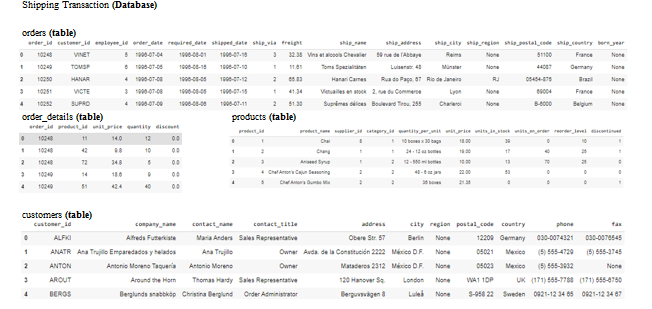

In [ ]:
#install ini untuk pertama kalinya
#!pip install psycopg2

In [ ]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd

# Bangun konektivitas
host = "ec2-54-164-22-242.compute-1.amazonaws.com"
dbname = "d92sarup3qlji0"
user = "fttxsdmckdfikz"
password = "c5561e667cd292f382a0e437807e05c89fba1b894dddff1e77e07befe8a866ac"
connection = pg.connect(f"host={host} dbname={dbname} user={user} password={password}")

# Function SQL
def sql(doc):
    return psql.read_sql_query(doc, connection)

In [ ]:
# Mengenal SELECT 
# list_table_name: orders, order_details, products, customers 

# All column in table
sql(
"""
SELECT * FROM order_details;
""").head(5)

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


Bagaimana mengambil kolom **ship_region** dan **ship_postal_code**? ada yang tau caranya?

In [ ]:
# Tulis disini ya! 
sql("""
SELECT [1]_______ FROM orders;
""")

,ship_region,ship_postal_code
0,None,51100
1,None,44087
2,RJ,05454-876
3,None,69004
4,None,B-6000
...,...,...
825,None,05033
826,None,1734
827,None,1204
828,None,13008


Catatan:

Jika kita mau menarik lebih dari satu kolom, bukan semua kolom ya!

```sql
SELECT column_name1, column_name2 FROM table_name
```

Ini artinya dengan memberi tanda (,) dalam penulisannya. Cukup sederhana bukan?

Jika kita hanya mengambil 5 data dari data kita sebelumnya tersebut?

In [ ]:
# TEKNIK 1
sql('SELECT ship_country, ship_postal_code FROM orders;').head(5)

,ship_country,ship_postal_code
0,France,51100
1,Germany,44087
2,Brazil,05454-876
3,France,69004
4,Belgium,B-6000


In [ ]:
# TEKNIK 2
sql("SELECT ship_country, ship_postal_code FROM orders [1]_____")

,ship_country,ship_postal_code
0,France,51100
1,Germany,44087
2,Brazil,05454-876
3,France,69004
4,Belgium,B-6000


In [ ]:
# TEKNIK 2
sql('SELECT product_name, supplier_id FROM products [1]_____;')

,product_name,supplier_id
0,Chai,8
1,Chang,1
2,Aniseed Syrup,1
3,Chef Anton's Cajun Seasoning,2
4,Chef Anton's Gumbo Mix,2
5,Grandma's Boysenberry Spread,3
6,Uncle Bob's Organic Dried Pears,3
7,Northwoods Cranberry Sauce,3
8,Mishi Kobe Niku,4
9,Ikura,4


Catatan:

Jika kita mau menarik hanya sebagian row dapat dilakukan seperti berikut ini

```sql
SELECT column_name1, column_name2 FROM table_name LIMIT N
```

N merupakan jumlah batasan yang akan ditampilkan dalam database

Jika kita ingin mengambil data yang unique dari database bagaimana?

In [ ]:
# dua kolom
sql('SELECT ship_country, ship_postal_code FROM orders;').shape

(830, 2)

In [ ]:
# dua kolom
sql('SELECT [1]____ ship_country, ship_postal_code FROM orders;').shape

(85, 2)

Catatan:

Jika kita mau menarik dengan yang unik tanpa duplikasi, sebagai berikutnya

```sql
SELECT DISTINCT column_name1, column_name2 FROM table_name LIMIT n
```

**DISTINCT** akan berguna untuk mengambil data tanpa duplikasi.